In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import json

# Load stylesheet to define fontsize, linewidth, etc.
plt.style.use("stylesheet.mplstyle")

plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

## Definitions

In [3]:
result_dir = "bad_actor_no_bias_grid"
helpfulness = "helpfulness_True"
condition = "all"
# import metrics, metric_names, and exp_to_y_axis_names from a global definition
metrics = json.load(open("definitions.json"))["metrics"]
metric_names = json.load(open("definitions.json"))["metric_names"]
exp_to_y_axis_names = json.load(open("definitions.json"))["exp_to_y_axis_names"]
ax_labels = json.load(open("definitions.json"))["ax_labels"]

## Read data

In [ ]:
# Load data
df = pd.read_csv(f"{result_dir}/FP_count/{helpfulness}.csv")
df = df[df["condition"] == condition]
df = df.drop_duplicates(subset=["st_prop", "bhvr_rate"], keep="first").copy()
# rescale st_prop to 0-100
df["st_prop"] = df["st_prop"] * 100

## Main figures - suppression & pollution

In [5]:
## Helpers
def format_integer_ticks_from_labels(tick_map, val, pos=None, no_decimals=2):
    """
    Formatter that looks up the label from tick_map
    and formats it with custom rounding.
    tick_map: dict, mapping from tick index to label value
    """
    if val in tick_map:
        x = tick_map[val]
        if x % 1 == 0:
            return f"{int(round(x))}"
        return f"{x:.{no_decimals}f}"
    return ""  # hide ticks not in the mask

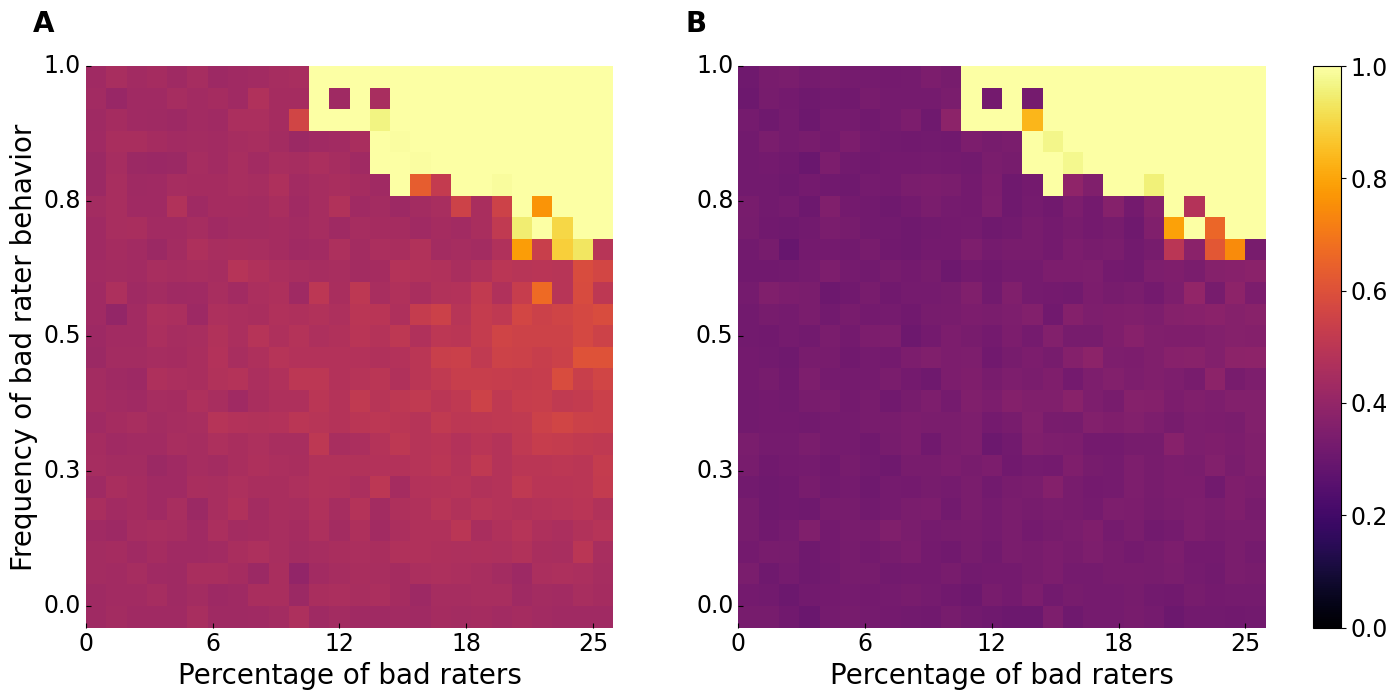

In [ ]:
FIG_NAME = "Fig.2_unbiased_bad_main_"
# Figure setup with constrained layout
fig, axes = plt.subplots(1, 2, figsize=(14, 7), layout="constrained")

# Control padding with constrained layout
fig.set_constrained_layout_pads(
    w_pad=0.1,  # horizontal padding between subplots
    h_pad=0.1,  # vertical padding between subplots
    wspace=0.1,  # width space between subplots (similar to wspace in subplots_adjust)
    hspace=0.1,  # height space between subplots (similar to hspace in subplots_adjust)
)

vmin, vmax = 0.0, 1.0
cmap = "inferno"

mappable = None
for i, (ax, metric) in enumerate(zip(axes.flat, metrics[:2])):
    row, col = divmod(i, 2)  # figure out row/col index

    # Pivot for heatmap
    hm = (
        df.pivot_table(
            index="bhvr_rate", columns="st_prop", values=metric, aggfunc="mean"
        )
        .sort_index(ascending=False)
        .reindex(sorted(df["st_prop"].unique()), axis=1)
    )

    g = sns.heatmap(hm, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, fmt=".2f", cbar=False)

    ax.set_title(
        metric_names.get(metric, metric), pad=20, color="white"
    )  # Adjust padding between title and x-axis
    ax.set_xlabel(ax_labels["st_prop"])

    # Add subplot labels (A, B, C, D) outside the subplot area
    subplot_labels = ["A", "B", "C", "D"][:2]
    ax.text(
        -0.1,
        1.05,
        subplot_labels[i],
        transform=ax.transAxes,
        fontsize=20,
        fontweight="bold",
        va="bottom",
        ha="left",
        bbox=dict(boxstyle="round,pad=0.1", facecolor="white", alpha=0),
    )

    # Only show ylabel for first col
    if col == 0:
        ax.set_ylabel(ax_labels["bhvr_rate"])
    else:
        ax.set_ylabel("")
        ax.yaxis.set_label_position("right")  # no label, but keep ticks on right
        # ax.yaxis.tick_right()

    if mappable is None:  # keep first heatmap for colorbar
        mappable = g.collections[0]

    # Custom formatting
    import matplotlib.ticker as mticker

    ax.tick_params(direction="in")

    # Enable y-axis tick labels on the right
    plt.rcParams["ytick.right"] = True
    plt.rcParams["xtick.top"] = True

    # X axis ticks - show only a few major ticks
    xvals = hm.columns.astype(float)  # numeric st_prop values
    ax.set_xticks(np.linspace(0, len(xvals) - 1, 5))  # Show 5 evenly spaced ticks
    ax.set_xticklabels(
        [f"{xvals[int(i)]:.0f}" for i in np.linspace(0, len(xvals) - 1, 5)], rotation=0
    )

    # Y axis ticks - show only a few major ticks
    yvals = hm.index.astype(float)  # numeric bhvr_rate values
    ax.set_yticks(np.linspace(0, len(yvals) - 1, 5))  # Show 5 evenly spaced ticks
    ax.set_yticklabels(
        [f"{yvals[int(i)]:.1f}" for i in np.linspace(0, len(yvals) - 1, 5)]
    )


# Single colorbar, neatly attached to figure
cbar = fig.colorbar(mappable, ax=axes, orientation="vertical", fraction=0.025, pad=0.04)

plot_dir = "plots"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
# Save outputs
plt.savefig(f"{plot_dir}/{FIG_NAME}{helpfulness}.png", dpi=300, bbox_inches="tight")
plt.savefig(f"{plot_dir}/{FIG_NAME}{helpfulness}.pdf", dpi=300, bbox_inches="tight")

plt.show()

ValueError: Incorrect use of keyword argument 'rotation'. Keyword arguments other than 'minor' modify the text labels and can only be used if 'labels' are passed as well.

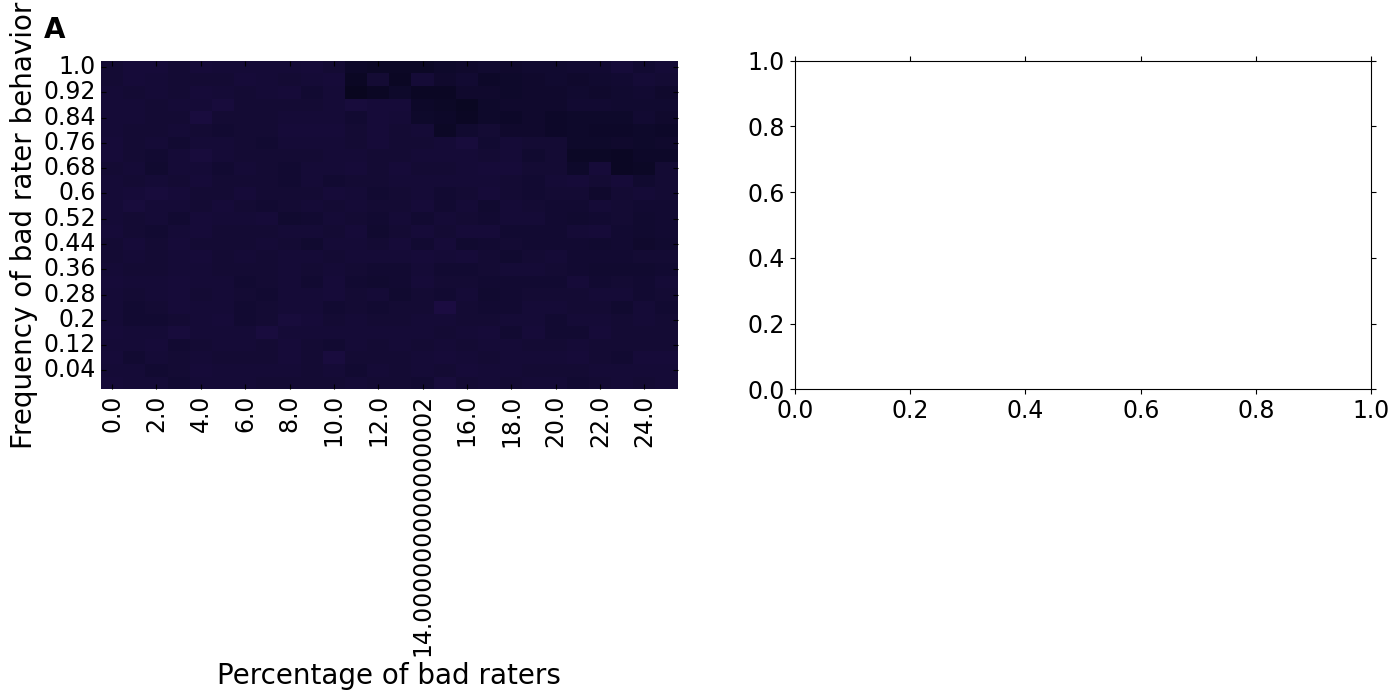

In [ ]:
FIG_NAME = "Fig.2_unbiased_bad_supp_"
# Figure setup with constrained layout
fig, axes = plt.subplots(1, 2, figsize=(14, 7), layout="constrained")

# Control padding with constrained layout
fig.set_constrained_layout_pads(
    w_pad=0.1,  # horizontal padding between subplots
    h_pad=0.1,  # vertical padding between subplots
    wspace=0.1,  # width space between subplots (similar to wspace in subplots_adjust)
    hspace=0.1,  # height space between subplots (similar to hspace in subplots_adjust)
)

vmin, vmax = 0.0, 1.0
cmap = "inferno"

mappable = None
for i, (ax, metric) in enumerate(zip(axes.flat, metrics[2:])):
    row, col = divmod(i, 2)  # figure out row/col index

    # Pivot for heatmap
    hm = (
        df.pivot_table(
            index="bhvr_rate", columns="st_prop", values=metric, aggfunc="mean"
        )
        .sort_index(ascending=False)
        .reindex(sorted(df["st_prop"].unique()), axis=1)
    )

    g = sns.heatmap(hm, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, fmt=".2f", cbar=False)

    ax.set_title(
        metric_names.get(metric, metric), pad=20, color="white"
    )  # Adjust padding between title and x-axis
    ax.set_xlabel(ax_labels["st_prop"])

    # Add subplot labels (A, B, C, D) outside the subplot area
    subplot_labels = ["A", "B", "C", "D"][:2]
    ax.text(
        -0.1,
        1.05,
        subplot_labels[i],
        transform=ax.transAxes,
        fontsize=20,
        fontweight="bold",
        va="bottom",
        ha="left",
        bbox=dict(boxstyle="round,pad=0.1", facecolor="white", alpha=0),
    )

    # Only show ylabel for first col
    if col == 0:
        ax.set_ylabel(ax_labels["bhvr_rate"])
    else:
        ax.set_ylabel("")
        ax.yaxis.set_label_position("right")  # no label, but keep ticks on right
        # ax.yaxis.tick_right()

    if mappable is None:  # keep first heatmap for colorbar
        mappable = g.collections[0]

    # Custom formatting
    import matplotlib.ticker as mticker

    ax.tick_params(direction="in")

    # Enable y-axis tick labels on the right
    plt.rcParams["ytick.right"] = True
    plt.rcParams["xtick.top"] = True

    # X axis ticks
    xvals = hm.columns.astype(float)  # numeric st_prop values
    xticks = np.arange(len(xvals))  # positions (0..N-1)
    # tick positions at step=0.1, plus max
    x_targets = np.arange(0, xvals.max() + 10, 5)
    x_targets = np.unique(np.append(x_targets, xvals.max()))
    xmask = np.isin(np.round(xvals, 3), np.round(x_targets, 3))
    # Build mapping from tick index (0..N-1) → your desired label value
    x_tick_map = dict(zip(xticks[xmask], xvals[xmask]))
    # Set ticks & Apply formatter
    ax.set_xticks(xticks[xmask])
    ax.set_xticklabels(
        [f"{xvals[int(i)]:.0f}" for i in np.linspace(0, len(xvals) - 1, 5)], rotation=0
    )
    # ax.xaxis.set_major_formatter(
    #     mticker.FuncFormatter(
    #         lambda val, pos: format_integer_ticks_from_labels(
    #             x_tick_map, val, pos, no_decimals=0
    #         )
    #     )
    # )
    # Y axis ticks
    yvals = hm.index.astype(float)  # numeric bhvr_rate values
    yticks = np.arange(0, len(yvals), 1)  # positions (0..M-1)
    ymask = np.isin(
        np.round(yvals, 2), np.round(np.arange(0, yvals.max() + 0.1, 0.1), 2)
    )
    y_tick_map = dict(zip(yticks[ymask], yvals[ymask]))
    # Set ticks & Apply formatter
    ax.set_yticks(yticks[ymask])

    ax.yaxis.set_major_formatter(
        mticker.FuncFormatter(
            lambda val, pos: format_integer_ticks_from_labels(
                y_tick_map, val, pos, no_decimals=1
            )
        )
    )


# Single colorbar, neatly attached to figure
cbar = fig.colorbar(mappable, ax=axes, orientation="vertical", fraction=0.025, pad=0.04)

plot_dir = "plots"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
# Save outputs
plt.savefig(f"{plot_dir}/{FIG_NAME}{helpfulness}.png", dpi=300, bbox_inches="tight")
plt.savefig(f"{plot_dir}/{FIG_NAME}{helpfulness}.pdf", dpi=300, bbox_inches="tight")

plt.show()